# Run me while William talks!

In [ ]:
pip install miepython


In [ ]:
import math
import matplotlib.pyplot as plt
import miepython
from mpl_toolkits import mplot3d

In [ ]:
def writeDDSCAT(pos,pos2=[]):
    if len(pos2) == 0:
        tot = pos
    else:
        tot = np.concatenate([pos,pos2])
    nParticles = len(tot)
    x = int(np.max(tot[0,:]))- int(np.min(tot[0,:]))
    y = int(np.max(tot[1,:]))- int(np.min(tot[1,:]))
    z = int(np.max(tot[2,:]))- int(np.min(tot[2,:]))
    with open( 'shape.dat', 'w' ) as g:
        g.write(' >TARREC   rectangular prism; AX,AY,AZ= ' +repr(x)+' '+repr(y)+' '+repr(z)+'\n     '+repr(nParticles)+' = NAT \n')
        g.write('  1.000000  0.000000  0.000000 = A_1 vector\n')
        g.write('  0.000000  1.000000  0.000000 = A_2 vector\n')
        g.write('  1.000000  1.000000  1.000000 = lattice spacings (d_x,d_y,d_z)/d\n')
        g.write('  0.000000  0.000000  0.000000 = lattice offset x0(1-3) = (x_TF,y_TF,z_TF)/d for dipole 0 0 0\n')
        g.write('       JA  IX  IY  IZ ICOMP(x,y,z)\n')
        for t in range(len(pos)):
            g.write( "      {0:.0f}   {1:.0f}   {2:.0f}   {3:.0f} 1 1 1 \n".format( t+1, pos[ t, 0 ], pos[ t, 1 ], pos[ t, 2 ] ) ) 
        for p in range(len(pos2)):
            g.write( "      {0:.0f}   {1:.0f}   {2:.0f}   {3:.0f} 2 2 2 \n".format( t+p+2, pos2[ p, 0 ], pos2[ p, 1 ], pos2[ p, 2 ] ) )
    return pos

# Modelling Easy Nanoparticles

What is perfect?
Mie theory, is based on perfect spheres of metal nanoparticles. The refractive index of the metal is used to determine the optical properties at a given wavelength. Below you'll find some code that you can ignore, and some code you can play around with.

In [ ]:
#This section can be ignored, as it is just setting up the optical properties. 
# from https://refractiveindex.info/?shelf=main&book=Au&page=Johnson
# wavelength in microns
ref_lam=np.array([0.1879,0.1916,0.1953,0.1993,0.2033,0.2073,0.2119,0.2164,
                  0.2214,0.2262,0.2313,0.2371,0.2426,0.2490,0.2551,0.2616,
                  0.2689,0.2761,0.2844,0.2924,0.3009,0.3107,0.3204,0.3315,
                  0.3425,0.3542,0.3679,0.3815,0.3974,0.4133,0.4305,0.4509,
                  0.4714,0.4959,0.5209,0.5486,0.5821,0.6168,0.6595,0.7045,
                  0.7560,0.8211,0.8920,0.9840,1.0880,1.2160,1.3930,1.6100,1.9370])

ref_n=np.array([1.28,1.32,1.34,1.33,1.33,1.30,1.30,1.30,1.30,1.31,1.30,
                1.32,1.32,1.33,1.33,1.35,1.38,1.43,1.47,1.49,1.53,1.53,
                1.54,1.48,1.48,1.50,1.48,1.46,1.47,1.46,1.45,1.38,1.31,
                1.04,0.62,0.43,0.29,0.21,0.14,0.13,0.14,0.16,0.17,0.22,
                0.27,0.35,0.43,0.56,0.92])

ref_k=np.array([1.188,1.203,1.226,1.251,1.277,1.304,1.350,1.387,1.427,
                1.460,1.497,1.536,1.577,1.631,1.688,1.749,1.803,1.847,
                1.869,1.878,1.889,1.893,1.898,1.883,1.871,1.866,1.895,
                1.933,1.952,1.958,1.948,1.914,1.849,1.833,2.081,2.455,
                2.863,3.272,3.697,4.103,4.542,5.083,5.663,6.350,7.150,
                8.145,9.519,11.21,13.78])

In [ ]:
#This is what you can play around with
radius = 0.05    # in microns
cross_section_area = np.pi * radius**2


In [ ]:
#This part calculates the cross sections
m = ref_n-1.0j*ref_k
x = 2*np.pi*radius/ref_lam
mu_a = 4 * np.pi * ref_k / ref_lam    # nm
qext, qsca, qback, g = miepython.mie(m,x)
sca_cross_section = qsca * cross_section_area
abs_cross_section = (qext-qsca) * cross_section_area

#This part plots it in pretty pictures
plt.subplots(3,1,figsize=(9,9))
plt.subplot(311)
plt.plot(ref_lam*1000, ref_n, 'ob')
plt.plot(ref_lam*1000, -ref_k, 'sr')
plt.title("Gold Spheres 100nm diameter")
plt.xticks([])
plt.text(700, 1, "real refractive index", color='blue')
plt.text(1100, -6, "imaginary refractive index", color='red')

plt.subplot(312)
plt.plot(ref_lam*1000, qext, 'ob')
plt.ylabel("Extinction Efficiency")

plt.subplot(313)
plt.plot(ref_lam*1000, abs_cross_section, 'ob')
plt.plot(ref_lam*1000, sca_cross_section, 'sr')
plt.xlabel("Wavelength (nm)")
plt.ylabel(r"Cross Section (µm$^2$)")
plt.text(700, 0.015, "absorption", color='blue')
plt.text(750, 0.01, "scattering", color='red')
plt.savefig("04_plot.png")
plt.show()

Wow! That was easy and fast! This is not a model as much as it is a fact. It changes slightly depending on the refractive index used, but it doesn't need any special techiques to solve. However, this only works for spherical particles (including core shell nanoparticles). We may need more complex shapes though.



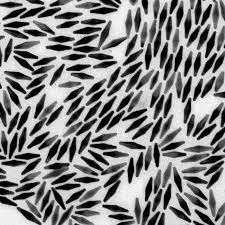

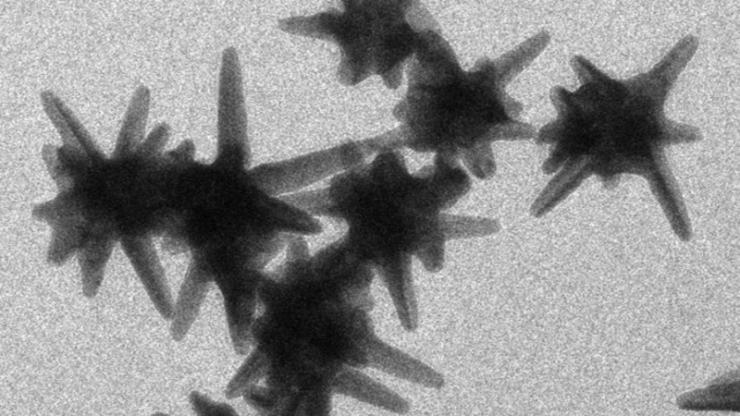

# Discrete Dipole Approximation (DDA)

Make sure to close the last section so that we have some space to work here.

So how do we model the complex shapes? The easiest method (due to computation time, and resources available) is DDA. Essentially, we take a collection of points and say "Hey! each one of these points is like a dipole, lets see how the interact when they're next to each other." To give a mental image, when a nanoparticle is excited, each atom acts as a dipole, and all of the atoms around interact with each other. So that just means we have to solve maxwells equation for every atom with respect to every atom. If our particle has 5000 atoms, that is only 5000^5000 calculations to do... ooo... That's a lot but that's why we're not doing it by hand. 




For custom shapes, we have to do a little bit more work. Spheres, rods, and taurus are used enough that people have made 'structures' to represent them. Before we make a super complex structure, we should prove to ourselves that we know what we're doing. So, let's model a sphere!

We need:
*   A list of points (at least 10,000)
*   The total volume
*   A material
*   A comparison (published or Mie)





In [ ]:
#We will start by making a box
#Then we will make sure our points are in the sphere
#Then we will add them to a list
radius = 50 #nm
box_length = #PUT THE BOX LENGTH HERE
#We will go through every point in the box, and determine if that is part of the sphere.
#What is the condition that we need?
points = np.linspace(int(-box_length/2), int(box_length/2),int(box_length+1))
print(points)


In [ ]:
particle = [] #this is just an empty list where we are going to store our results 
for x in points:
  for y in points:
    for z in points:
      if #PUT YOUR CONDITION HERE:
        particle.append([x,y,z])
particle = np.array(particle).astype(int)

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(particle[:,0], particle[:,1], particle[:,2])
plt.show()

omg, is that a sphere? Then we're in business! Since we put one point on every 1nm^3, then the volume that we have here should be equal to the number of points. Let's check.

In [ ]:
vol = len(particle)
aeff = (vol*(3/4)/np.pi)**(1/3)
print('The effective radius is ',"{:.4f}".format(aeff/1000))

The effective radius is going to be crucial for the program to figure out how far the dipoles are spaced. With more complex particles this can become more difficult.

Where do we find our material information? Much easier,
[this is a great resource](https://refractiveindex.info/?shelf=main&book=Au&page=Johnson)

Finally, we compare our sphere to a mie sphere, to see if there are any differences! 

In [ ]:
#This part is pre written to make it a little bit easier, but it will generate a shape file that you can use in the next part.
particles = list(particles)
writeDDSCAT(particles)

# Increased Complexity

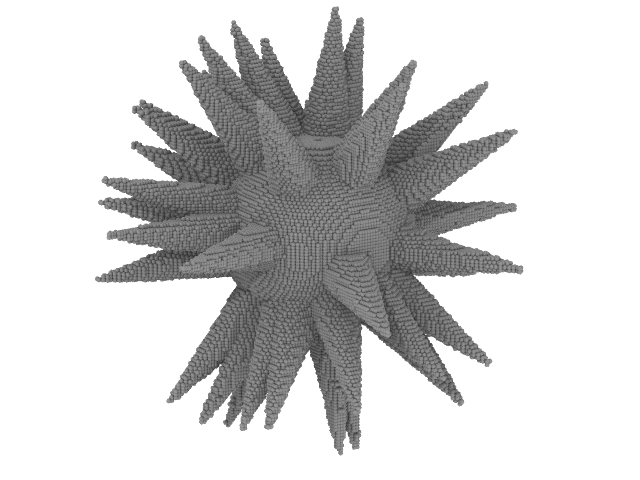

# DDSCAT

DDSCAT is a free program for doing dda calculations. The parameter file can be quite daunting, but there really isn't much to it.

In [ ]:
' ========== Parameter file for v7.3 ===================' 
'**** Preliminaries ****'
'NOTORQ' = CMDTRQ*6 (DOTORQ, NOTORQ) -- either do or skip torque calculations
'PBCGS2' = CMDSOL*6 (PBCGS2, PBCGST, GPBICG, QMRCCG, PETRKP) -- CCG method
'GPFAFT' = CMETHD*6 (GPFAFT, FFTMKL) -- FFT method
'GKDLDR' = CALPHA*6 (GKDLDR, LATTDR, FLTRCD) -- DDA method
'NOTBIN' = CBINFLAG (NOTBIN, ORIBIN, ALLBIN) -- binary output?
'**** Initial Memory Allocation ****'
300 300 300 = dimensioning allowance for target generation
'**** Target Geometry and Composition ****'
'FROM_FILE' = CSHAPE*9 shape directive
no SHPAR parameters needed
1         = NCOMP = number of dielectric materials
'Au_evap' = file with refractive index 1
'**** Additional Nearfield calculation? ****'
0 = NRFLD (=0 to skip nearfield calc., =1 for nearfield E, =2 for E and B)
0.5 0.5 0.5 0.5 0.5 0.5 (fract. extension of vol. in -x,+x,-y,+y,-z,+z)
'**** Error Tolerance ****'
1.00e-5 = TOL = MAX ALLOWED (NORM OF |G>=AC|E>-ACA|X>)/(NORM OF AC|E>)
'**** Maximum number of iterations ****'
100000     = MXITER
'**** Integration limiter for PBC calculations ****'
1.00e-2 = GAMMA (1e-2 is normal, 3e-3 for greater accuracy)
'**** Angular resolution for calculation of <cos>, etc. ****'
0.5	= ETASCA (number of angles is proportional to [(3+x)/ETASCA]^2 )
'**** Vacuum Wavelengths (micron) ****'
0.7 1.2 18 'LIN' = wavelengths (1st,last,howmany,how=LIN,INV,LOG,TAB)
'**** Refractive index of ambient medium ****'
1.33 = NAMBIENT
'**** Effective Radii (micron) **** '
REPRAD REPRAD 1 'LIN' = a_eff (1st,last,howmany,how=LIN,INV,LOG,TAB)
'**** Define Incident Polarizations ****'
(0,0) (0,0.) (1.,0) = Polarization state e01 (k along x axis)
1 = IORTH  (=1 to do only pol. state e01; =2 to also do orth. pol. state)
'**** Specify which output files to write ****'
0 = IWRKSC (=0 to suppress, =1 to write ".sca" file for each target orient.
'**** Specify Target Rotations ****'
0.0    360.0  1  = BETAMI, BETAMX, NBETA  (beta=rotation around a1)
0.0    180.0  1  = THETMI, THETMX, NTHETA (theta=angle between a1 and k)
0.0    360.0  1  = PHIMIN, PHIMAX, NPHI (phi=rotation angle of a1 around k)
'**** Specify first IWAV, IRAD, IORI (normally 0 0 0) ****'
0   0   0    = first IWAV, first IRAD, first IORI (0 0 0 to begin fresh)
'**** Select Elements of S_ij Matrix to Print ****'
6	= NSMELTS = number of elements of S_ij to print (not more than 9)
11 12 21 22 31 41	= indices ij of elements to print
'**** Specify Scattered Directions ****'
'LFRAME' = CMDFRM (LFRAME, TFRAME for Lab Frame or Target Frame)
1 = NPLANES = number of scattering planes
0.  0. 180. 10 = phi, theta_min, theta_max (deg) for plane A

In [ ]:
 DDSCAT --- DDSCAT 7.3.3 [19.08.25]   
 TARGET --- >TARREC   rectangular prism; AX,AY,AZ= 58 57 57                   
 GPFAFT --- method of solution 
 GKDLDR --- prescription for polarizabilities
 FROM_FILE --- shape 
 226884 = NAT0 = number of dipoles
 Au_evap                                                     
   0.000 360.000 = beta_min, beta_max ;  NBETA = 1
   0.000 180.000 = theta_min, theta_max; NTHETA= 1
   0.000 360.000 = phi_min, phi_max   ;   NPHI = 1
 0.5000 = ETASCA (param. controlling # of scatt. dirs used to calculate <cos> etc.
 Results averaged over    1 target orientations
                   and  1 incident polarizations
   aeff       wave       Q_ext     Q_abs      Q_sca     g(1)=<cos>  <cos^2>    Q_bk       Nsca
 3.7800E-02 7.0000E-01 3.6956E+00 3.1531E+00 5.4257E-01  2.7746E-02 4.0079E-01 5.9214E-02   285
 3.7800E-02 7.2471E-01 3.9635E+00 3.3736E+00 5.8998E-01  2.6364E-02 4.0080E-01 6.4624E-02   248
 3.7800E-02 7.4941E-01 4.5836E+00 3.8461E+00 7.3754E-01  2.5217E-02 4.0035E-01 8.0807E-02   248
 3.7800E-02 7.7412E-01 5.5505E+00 4.6195E+00 9.3097E-01  2.6050E-02 3.9988E-01 1.0127E-01   248
 3.7800E-02 7.9882E-01 6.4599E+00 5.3679E+00 1.0921E+00  2.4556E-02 4.0005E-01 1.1924E-01   248
 3.7800E-02 8.2353E-01 7.1800E+00 5.9653E+00 1.2147E+00  2.2013E-02 4.0051E-01 1.3382E-01   248
 3.7800E-02 8.4824E-01 8.0039E+00 6.5828E+00 1.4212E+00  1.6914E-02 4.0057E-01 1.5922E-01   248
 3.7800E-02 8.7294E-01 8.5120E+00 6.9175E+00 1.5946E+00  1.2744E-02 4.0084E-01 1.8135E-01   248
 3.7800E-02 8.9765E-01 7.9373E+00 6.4463E+00 1.4910E+00  1.0143E-02 4.0129E-01 1.7125E-01   248
 3.7800E-02 9.2235E-01 7.0005E+00 5.7124E+00 1.2881E+00  9.3248E-03 4.0144E-01 1.4837E-01   248
 3.7800E-02 9.4706E-01 6.0120E+00 4.9258E+00 1.0861E+00  9.5399E-03 4.0155E-01 1.2498E-01   248
 3.7800E-02 9.7176E-01 5.0392E+00 4.1439E+00 8.9534E-01  8.3079E-03 4.0161E-01 1.0337E-01   248
 3.7800E-02 9.9647E-01 4.2118E+00 3.4740E+00 7.3786E-01  5.7186E-03 4.0161E-01 8.5859E-02   248
 3.7800E-02 1.0212E+00 3.5259E+00 2.9186E+00 6.0737E-01  3.3491E-03 4.0162E-01 7.1181E-02   248
 3.7800E-02 1.0459E+00 2.9825E+00 2.4766E+00 5.0593E-01  1.9921E-03 4.0169E-01 5.9527E-02   248
 3.7800E-02 1.0706E+00 2.5235E+00 2.1003E+00 4.2317E-01  1.0436E-03 4.0174E-01 4.9918E-02   248
 3.7800E-02 1.0953E+00 2.1457E+00 1.7902E+00 3.5553E-01  1.1282E-04 4.0176E-01 4.2044E-02   248
 3.7800E-02 1.1200E+00 1.8338E+00 1.5333E+00 3.0050E-01 -5.9509E-04 4.0176E-01 3.5601E-02   248


If you want to try some smaller experiments on your own, [this is an online tool that you can use to run DDSCAT](https://nanohub.org/tools/ddaplus/). However, it is for very simple shapes, as the computer isn't strong enough to handle anything above 100,000 particles. 